<a href="https://colab.research.google.com/github/NgoCuVan/Labs_ML/blob/main/Lab_4_21130608_NgoCuVan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




Accuracy:  <function accuracy_score at 0x7cafe4610550>
Recall (micro):  1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



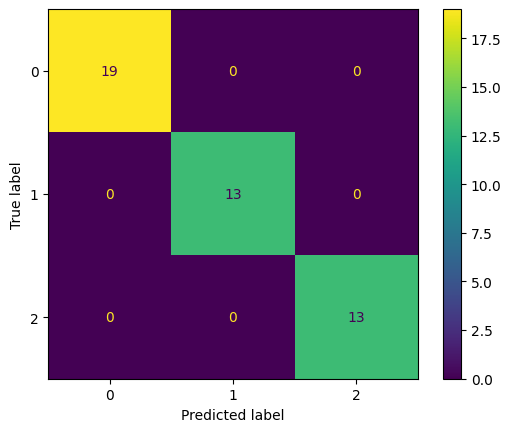

In [ ]:
from sklearn import datasets
data1 = datasets.load_iris()

X = data1.data
y = data1.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_score)

recall_micro = recall_score(y_test, y_pred, average='micro')
print('Recall (micro): ', recall_micro)

print(classification_report(y_test, y_pred, target_names=data1.target_names))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/Lab4/Data'
data_train = pd.read_csv('fashion_train.csv')
data_test = pd.read_csv('fashion_test.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML/Lab4/Data


Accuracy: 0.802
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        91
           1       0.99      0.95      0.97        92
           2       0.65      0.77      0.70        91
           3       0.86      0.75      0.80       105
           4       0.68      0.69      0.68        99
           5       0.90      0.86      0.88       105
           6       0.54      0.46      0.50        99
           7       0.86      0.86      0.86        94
           8       0.91      0.93      0.92       115
           9       0.91      0.92      0.91       109

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



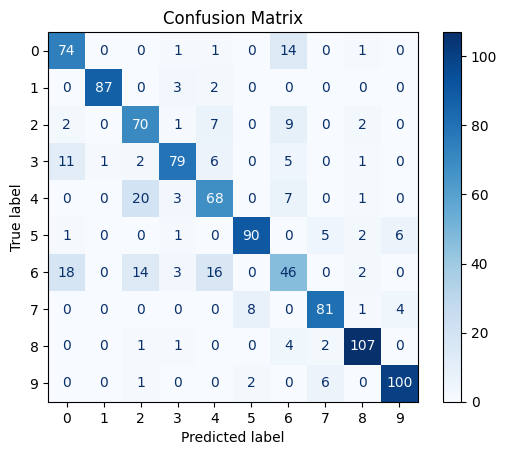

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
X_train = data_train.drop(columns=['y'], axis=1).iloc[:1000]
y_train = data_train['y'].iloc[:1000]
X_test = data_test.drop(columns=['y'], axis=1)
y_test = data_test['y']

X_train = X_train / 255.0
X_test = X_test / 255.0

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


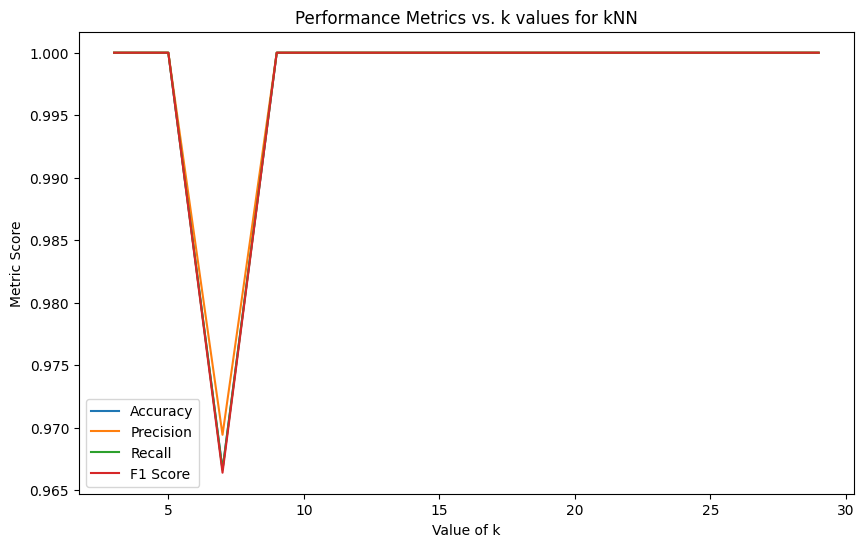

Best value of k based on accuracy: 3
+---------------------+----------+-----------+--------+----------+
|      Algorithm      | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
|      kNN (k=3)      |   1.0    |    1.0    |  1.0   |   1.0    |
| Logistic Regression |   1.0    |    1.0    |  1.0   |   1.0    |
+---------------------+----------+-----------+--------+----------+


In [ ]:
from prettytable import PrettyTable
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y= iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = list(range(3, 30, 2))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.xlabel('Value of k')
plt.ylabel('Metric Score')
plt.title('Performance Metrics vs. k values for kNN')
plt.legend()
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print("Best value of k based on accuracy:", best_k)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["kNN (k={})".format(best_k), np.max(accuracy_scores), precision_scores[k_values.index(best_k)],
               recall_scores[k_values.index(best_k)], f1_scores[k_values.index(best_k)]])
table.add_row(["Logistic Regression", accuracy_lr, precision_lr, recall_lr, f1_lr])

print(table)

#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


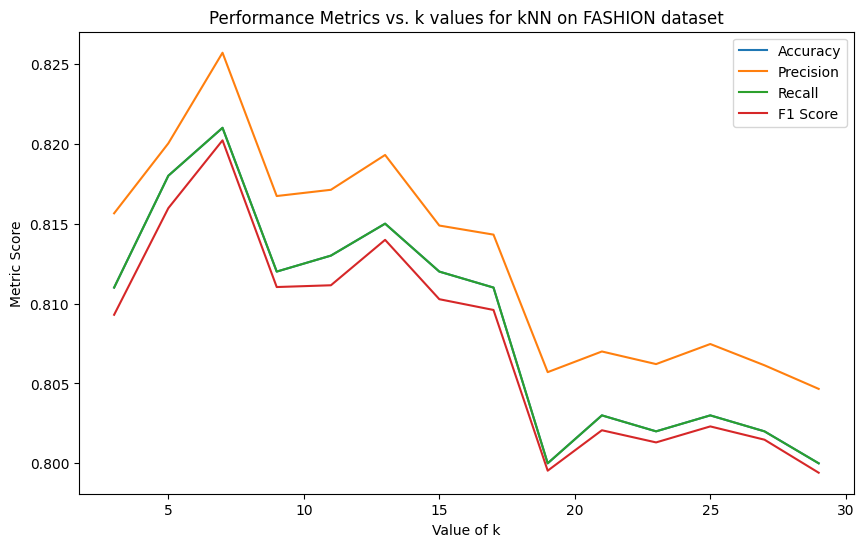

Best value of k based on accuracy: 7

Evaluation metrics for Logistic Regression:
Accuracy: 0.785
Precision: 0.7877634680001256
Recall: 0.785
F1 Score: 0.7856917746713675


In [48]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

fashion = fetch_openml(name='Fashion-MNIST', version=1, parser='auto')
X, y = fashion.data[:5000], fashion.target[:5000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = list(range(3, 30, 2))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.xlabel('Value of k')
plt.ylabel('Metric Score')
plt.title('Performance Metrics vs. k values for kNN on FASHION dataset')
plt.legend()
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print("Best value of k based on accuracy:", best_k)

logistic_regression = LogisticRegression(solver='sag', max_iter=5000)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("\nEvaluation metrics for Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
                'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
                'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
                'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
                'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
                'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
                'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
                'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
                'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
                'capital_run_length_longest', 'capital_run_length_total', 'spam']
data = pd.read_csv(url, names=column_names)

# Split features and target variable
X = data.drop('spam', axis=1)
y = data['spam']

# Preprocessing: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model with different solver and regularization strength
logistic_regression = LogisticRegression(solver='liblinear', C=0.1, max_iter=1000, random_state=42)

# Train the model
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print evaluation metrics
print("\nEvaluation metrics for Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


Evaluation metrics for Logistic Regression:
Accuracy: 0.9163952225841476
Precision: 0.938375350140056
Recall: 0.8589743589743589
F1 Score: 0.896921017402945


In [ ]:
from prettytable import PrettyTable

# These 3 are the columns of the tables
t = PrettyTable(['Subject Code', 'Subject', 'Marks'])

# To insert rows:
t.add_row(['K01', 'Maths', 95])
t.add_row(['K04', 'Physics', 89])
t.add_row(['K03', 'Chemistry', 92])
t.add_row(['K08', 'English', 91])
t.add_row(['K29', 'Computer Science', 99])
t.add_row(['K06', 'Social Science', 86])

print(t)

+--------------+------------------+-------+
| Subject Code |     Subject      | Marks |
+--------------+------------------+-------+
|     K01      |      Maths       |   95  |
|     K04      |     Physics      |   89  |
|     K03      |    Chemistry     |   92  |
|     K08      |     English      |   91  |
|     K29      | Computer Science |   99  |
|     K06      |  Social Science  |   86  |
+--------------+------------------+-------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.